In [143]:
# Imports a utilizar 
import numpy as np
import matplotlib as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

from quickda.explore_data import *
from quickda.clean_data import *
from quickda.explore_numeric import *
from quickda.explore_categoric import *
from quickda.explore_numeric_categoric import *
from quickda.explore_time_series import *
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Abrir la data y observar su tipo de variable

In [144]:
# Crea una lista vacía para guardar los DataFrames
dfs = []

for year in range(2009, 2019):
    filename = f"data{year}.sav"
    df = pd.read_spss(filename)
    dfs.append(df)


# Concatena los DataFrames en uno solo
merged_df = pd.concat(dfs)

# Muestra las primeras 5 filas del DataFrame combinado
print(merged_df['Añoreg'].unique())

[   9.   10. 2010. 2011. 2012. 2013. 2014. 2015. 2016. 2017. 2018. 2019.]


In [145]:
merged_df.size

220174380

In [146]:
merged_df.columns

Index(['Depreg', 'mupreg', 'Mesreg', 'Añoreg', 'Depocu', 'Mupocu', 'Areag',
       'Libras', 'Onzas', 'Diaocu', 'Mesocu', 'Añoocu', 'Sexo', 'Tipar',
       'Edadp', 'Deprep', 'muprep', 'Gretnp', 'Escivp', 'Depnap', 'Mupnap',
       'Naciop', 'Ocupap', 'Edadm', 'Deprem', 'Muprem', 'Gretnm', 'Escivm',
       'Depnam', 'Mupnam', 'Naciom', 'Ocupam', 'Asisrec', 'Sitioocu', 'Tohite',
       'Tohinm', 'Tohivi', 'mupnap', 'Escolap', 'muprem', 'grupetma', 'mupnam',
       'Escolam', 'Mupreg', 'Muprep', 'Paisrep', 'Paisnacp', 'Paisrem',
       'Paisnacm', 'munnam', 'PuebloPP', 'Ciuopad', 'PuebloPM', 'Ciuomad',
       'Munpnap', 'ciuomad', 'TipoIns', 'ViaPar'],
      dtype='object')

In [147]:
merged_df.dtypes

Depreg      category
mupreg      category
Mesreg      category
Añoreg       float64
Depocu      category
Mupocu        object
Areag       category
Libras        object
Onzas         object
Diaocu       float64
Mesocu      category
Añoocu       float64
Sexo        category
Tipar         object
Edadp         object
Deprep      category
muprep        object
Gretnp      category
Escivp      category
Depnap        object
Mupnap        object
Naciop        object
Ocupap        object
Edadm         object
Deprem      category
Muprem        object
Gretnm      category
Escivm      category
Depnam        object
Mupnam        object
Naciom        object
Ocupam        object
Asisrec       object
Sitioocu      object
Tohite        object
Tohinm        object
Tohivi        object
mupnap      category
Escolap       object
muprem      category
grupetma    category
mupnam      category
Escolam       object
Mupreg        object
Muprep        object
Paisrep       object
Paisnacp      object
Paisrem      

In [148]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3796110 entries, 0 to 383262
Data columns (total 58 columns):
 #   Column    Dtype   
---  ------    -----   
 0   Depreg    category
 1   mupreg    category
 2   Mesreg    category
 3   Añoreg    float64 
 4   Depocu    category
 5   Mupocu    object  
 6   Areag     category
 7   Libras    object  
 8   Onzas     object  
 9   Diaocu    float64 
 10  Mesocu    category
 11  Añoocu    float64 
 12  Sexo      category
 13  Tipar     object  
 14  Edadp     object  
 15  Deprep    category
 16  muprep    object  
 17  Gretnp    category
 18  Escivp    category
 19  Depnap    object  
 20  Mupnap    object  
 21  Naciop    object  
 22  Ocupap    object  
 23  Edadm     object  
 24  Deprem    category
 25  Muprem    object  
 26  Gretnm    category
 27  Escivm    category
 28  Depnam    object  
 29  Mupnam    object  
 30  Naciom    object  
 31  Ocupam    object  
 32  Asisrec   object  
 33  Sitioocu  object  
 34  Tohite    object  


In [149]:
columns = merged_df.columns
numeric_data = merged_df._get_numeric_data().columns

categorical_data = set(columns) - set(numeric_data)
print("-> Columnas con valores numericos \n ",numeric_data ,'\n')
print("-> Columnas con valores categoricos\n ",categorical_data)

-> Columnas con valores numericos 
  Index(['Añoreg', 'Diaocu', 'Añoocu'], dtype='object') 

-> Columnas con valores categoricos
  {'Muprem', 'Escivp', 'munnam', 'Ciuomad', 'Muprep', 'Paisnacm', 'Naciom', 'Areag', 'Paisrep', 'Tohite', 'Gretnp', 'Sexo', 'mupnam', 'Gretnm', 'Mesocu', 'Escolam', 'Libras', 'muprep', 'Mupreg', 'Tohivi', 'Mesreg', 'mupreg', 'muprem', 'Mupocu', 'TipoIns', 'grupetma', 'Depnap', 'Onzas', 'Asisrec', 'Ciuopad', 'Edadm', 'Deprem', 'ViaPar', 'Edadp', 'Depnam', 'Paisrem', 'Escivm', 'Depocu', 'Deprep', 'Mupnam', 'Tohinm', 'Ocupam', 'PuebloPP', 'Mupnap', 'Paisnacp', 'Tipar', 'Naciop', 'PuebloPM', 'Munpnap', 'Escolap', 'Depreg', 'ciuomad', 'mupnap', 'Sitioocu', 'Ocupap'}


### Limpieza de Variables

Se toman las columnas que van a ser utilizadas en el modelo predictivo. Estas son:
- Departamento de registro
- Municipio de registro
- Escolaridad de la madre
- Escolaridad del padre
- Año de registro

In [150]:
data = merged_df.loc[:, ['Depreg', 'Mupocu', 'Escolam', 'Escolap', 'Añoreg']]

Vamos a verificar si la data que estamos tomando contiene valores nulos o NaN.

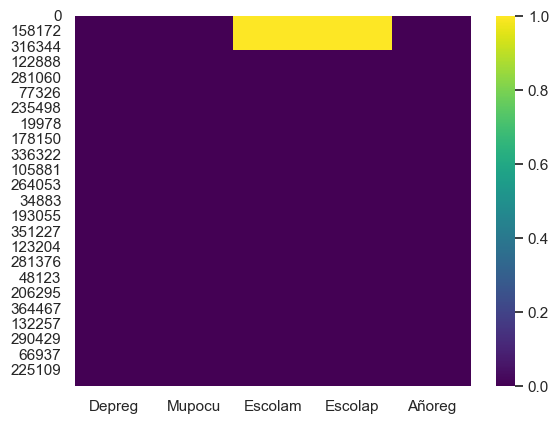

In [151]:
sns.heatmap(data.isna(), cmap='viridis')
plt.show()

Podemos observar que en nuestro dataset a utilizar contamos con algunos registros faltantes. Estos estan ubicados especificamente en las columnas de escolaridad de la madre y del padre del nacido.

In [152]:
data.head

<bound method NDFrame.head of               Depreg             Mupocu        Escolam        Escolap  Añoreg
0          Guatemala          Guatemala            NaN            NaN     9.0
1          Guatemala          Guatemala            NaN            NaN    10.0
2          Guatemala          Guatemala            NaN            NaN     9.0
3          Guatemala          Guatemala            NaN            NaN    10.0
4          Guatemala          Guatemala            NaN            NaN     9.0
...              ...                ...            ...            ...     ...
383258        Quiche             Chajul  Diversificado         Básica  2018.0
383259     Escuintla          Escuintla  Diversificado  Diversificado  2018.0
383260  Alta Verapaz   San Pedro Carchá        Ninguno       Primaria  2018.0
383261         Peten  Melchor de Mencos  Diversificado        Ninguno  2018.0
383262        Quiche              Cunén       Ignorado       Ignorado  2019.0

[3796110 rows x 5 columns]>

In [153]:
data.tail

<bound method NDFrame.tail of               Depreg             Mupocu        Escolam        Escolap  Añoreg
0          Guatemala          Guatemala            NaN            NaN     9.0
1          Guatemala          Guatemala            NaN            NaN    10.0
2          Guatemala          Guatemala            NaN            NaN     9.0
3          Guatemala          Guatemala            NaN            NaN    10.0
4          Guatemala          Guatemala            NaN            NaN     9.0
...              ...                ...            ...            ...     ...
383258        Quiche             Chajul  Diversificado         Básica  2018.0
383259     Escuintla          Escuintla  Diversificado  Diversificado  2018.0
383260  Alta Verapaz   San Pedro Carchá        Ninguno       Primaria  2018.0
383261         Peten  Melchor de Mencos  Diversificado        Ninguno  2018.0
383262        Quiche              Cunén       Ignorado       Ignorado  2019.0

[3796110 rows x 5 columns]>

In [154]:
data.columns

Index(['Depreg', 'Mupocu', 'Escolam', 'Escolap', 'Añoreg'], dtype='object')

In [155]:
data

,Depreg,Mupocu,Escolam,Escolap,Añoreg
0,Guatemala,Guatemala,NaN,NaN,9.0
1,Guatemala,Guatemala,NaN,NaN,10.0
2,Guatemala,Guatemala,NaN,NaN,9.0
3,Guatemala,Guatemala,NaN,NaN,10.0
4,Guatemala,Guatemala,NaN,NaN,9.0
...,...,...,...,...,...
383258,Quiche,Chajul,Diversificado,Básica,2018.0
383259,Escuintla,Escuintla,Diversificado,Diversificado,2018.0
383260,Alta Verapaz,San Pedro Carchá,Ninguno,Primaria,2018.0
383261,Peten,Melchor de Mencos,Diversificado,Ninguno,2018.0


In [156]:
data.shape

(3796110, 5)

In [157]:
data.dtypes

Depreg     category
Mupocu       object
Escolam      object
Escolap      object
Añoreg      float64
dtype: object

## Análisis Exploratorio

Podemos observar que en nuestro data set contamos con una unica variable numerica siendo el año del registro. Luego en cuanto a la escolaridad de ambos padres y el municipio y departamento de registro lo encontramos como categorico.

In [158]:
data['Escolam'] = data['Escolam'].fillna('Ninguno')
data['Escolap'] = data['Escolap'].fillna('Ninguno')

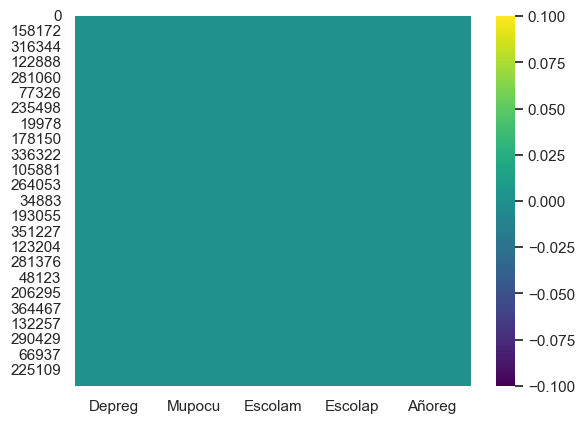

In [159]:
sns.heatmap(data.isna(), cmap='viridis')
plt.show()

In [160]:
data['Escolam'].unique()

array(['Ninguno', 'Diversificado', 'Universitario', 'Básica', 'Ignorado',
       'Primaria', 'Post Grado', 'Doctorado', 'Básico', 'Postgrado',
       'Post grado'], dtype=object)

In [161]:
data['Escolap'] = data['Escolap'].replace(['Post Grado', 'Post grado'], 'Postgrado')
data['Escolam'] = data['Escolap'].replace(['Post Grado', 'Post grado'], 'Postgrado')
data['Escolap'] = data['Escolap'].replace('Básico', 'Básica')
data['Escolam'] = data['Escolap'].replace('Básico', 'Básica')


In [162]:
data['Escolam'].unique()

array(['Ninguno', 'Diversificado', 'Universitario', 'Ignorado',
       'Postgrado', 'Básica', 'Primaria', 'Doctorado'], dtype=object)

In [163]:
data['Escolap'].unique()

array(['Ninguno', 'Diversificado', 'Universitario', 'Ignorado',
       'Postgrado', 'Básica', 'Primaria', 'Doctorado'], dtype=object)

Ahora vamos a codificar la escolaridad de la madre y del padre asignandoles un valor numerico a dichas variables. Para ello vamos a usar el diccionario de variables directamente brindado por el Instituto Nacional de Estadistica donde asignan:
- 1: Ninguno
- 2: Primaria
- 3: Básica
- 4: Diversificado
- 5: Universitario
- 6: Postgrado
- 7: Ignorado
- 8: Doctorado

In [164]:
data['Escolam'] = data['Escolam'].replace({
    'Ninguno': 1,
    'Primaria': 2,
    'Básica': 3,
    'Diversificado': 4,
    'Universitario': 5,
    'Postgrado': 6,
    'Ignorado': 7,
    'Doctorado': 8
})
data['Escolap'] = data['Escolap'].replace({
    'Ninguno': 1,
    'Primaria': 2,
    'Básica': 3,
    'Diversificado': 4,
    'Universitario': 5,
    'Postgrado': 6,
    'Ignorado': 7,
    'Doctorado': 8
})


In [165]:
data

,Depreg,Mupocu,Escolam,Escolap,Añoreg
0,Guatemala,Guatemala,1,1,9.0
1,Guatemala,Guatemala,1,1,10.0
2,Guatemala,Guatemala,1,1,9.0
3,Guatemala,Guatemala,1,1,10.0
4,Guatemala,Guatemala,1,1,9.0
...,...,...,...,...,...
383258,Quiche,Chajul,3,3,2018.0
383259,Escuintla,Escuintla,4,4,2018.0
383260,Alta Verapaz,San Pedro Carchá,2,2,2018.0
383261,Peten,Melchor de Mencos,1,1,2018.0


Realizaremos el mismo proceso para codificar el municipio y departamento del registro de nacimiento. Utilizando el diccionario brindado oficial obtenemos:
Departamentos
1. Guatemala
2. El Progreso
3. Sacatepéquez
4. Chimaltenango
5. Escuintla
6. Santa Rosa
7. Sololá
8. Totonicapán
9. Quetzaltenango
10. Suchitepéquez
11. Retalhuleu
12. San Marcos
13. Huehuetenango
14. Quiché
15. Baja Verapaz
16. Alta Verapaz
17. Petén
18. Izabal
19. Zacapa
20. Chiquimula
21. Jalapa
22. Jutiapa

Municipios
- 0101	Guatemala
- 0102	Santa Catarina Pinula
- 0103	San José Pinula
- 0104	San José del Golfo
- 0105	Palencia
- 0106	Chinautla
- 0107	San Pedro Ayampuc
- 0108	Mixco
- 0109	San Pedro Sacatepéquez
- 0110	San Juan Sacatepéquez
- 0111	San Raymundo
- 0112	Chuarrancho
- 0113	Fraijanes
- 0114	Amatitlán
- 0115	Villa Nueva
- 0116	Villa Canales
- 0117	Petapa
- 0201	Guastatoya
- 0202	Morazán
- 0203	San Agustín Acasaguastlán
- 0204	San Cristóbal Acasaguastlán
- 0205	El Jícaro
- 0206	Sansare
- 0207	Sanarate
- 0208	San Antonio la Paz
- 0301	Antigua Guatemala
- 0302	Jocotenango
- 0303	Pastores
- 0304	Sumpango
- 0305	Santo Domingo Xenacoj
- 0306	Santiago Sacatepéquez
- 0307	San Bartolomé Milpas Altas
- 0308	San Lucas Sacatepéquez
- 0309	Santa Lucía Milpas Altas
- 0310	Magdalena Milpas Altas
- 0311	Santa María de Jesús
- 0312	Ciudad Vieja
- 0313	San Miguel Dueñas
- 0314	Alotenango
- 0315	San Antonio Aguas Calientes
- 0316	Santa Catarina Barahona
- 0401	Chimaltenango
- 0402	San José Poaquil
- 0403	San Martín Jilotepeque
- 0404	Comalapa
- 0405	Santa Apolonia
- 0406	Tecpán Guatemala
- 0407	Patzún
- 0408	Pochuta
- 0409	Patzicía
- 0410	Santa Cruz Balanyá
- 0411	Acatenango
- 0412	Yepocapa
- 0413	San Andrés Itzapa
- 0414	Parramos
- 0415	Zaragoza
- 0416	El Tejar
- 0501	Escuintla
- 0502	Santa Lucía Cotzumalguapa
- 0503	La Democracia
- 0504	Siquinalá
- 0505	Masagua
- 0506	Tiquisate
- 0507	La Gomera
- 0508	Guanagazapa
- 0509	San José
- 0510	Iztapa
- 0511	Palín
- 0512	San Vicente Pacaya
- 0513	Nueva Concepción
- 0514	Sipacate
- 0601	Cuilapa
- 0602	Barberena
- 0603	Santa Rosa de Lima
- 0604	Casillas
- 0605	San Rafael las Flores
- 0606	Oratorio
- 0607	San Juan Tecuaco
- 0608	Chiquimulilla
- 0609	Taxisco
- 0610	Santa María Ixhuatán
- 0611	Guazacapán
- 0612	Santa Cruz Naranjo
- 0613	Pueblo Nuevo Viñas
- 0614	Nueva Santa Rosa
- 0701	Sololá
- 0702	San José Chacayá
- 0703	Santa María Visitación
- 0704	Santa Lucía Utatlán
- 0705	Nahualá
- 0706	Santa Catarina Ixtahuacán
- 0707	Santa Clara la Laguna
- 0708	Concepción
- 0709	San Andrés Semetabaj
- 0710	Panajachel
- 0711	Santa Catarina Palopó
- 0712	San Antonio Palopó
- 0713	San Lucas Tolimán
- 0714	Santa Cruz la Laguna
- 0715	San Pablo la Laguna
- 0716	San Marcos la Laguna
- 0717	San Juan la Laguna
- 0718	San Pedro la Laguna
- 0719	Santiago Atitlán
- 0801	Totonicapán
- 0802	San Cristóbal Totonicapán
- 0803	San Francisco el Alto
- 0804	San Andrés Xecul
- 0805	Momostenango
- 0806	Santa María Chiquimula
- 0807	Santa Lucía la Reforma
- 0808	San Bartolo
- 0901	Quetzaltenango
- 0902	Salcajá
- 0903	Olintepeque
- 0904	San Carlos Sija
- 0905	Sibilia
- 0906	Cabricán
- 0907	Cajolá
- 0908	San Miguel Siguilá
- 0909	Ostuncalco
- 0910	San Mateo
- 0911	Concepción Chiquirichapa
- 0912	San Martín Sacatepéquez
- 0913	Almolonga
- 0914	Cantel
- 0915	Huitán
- 0916	Zunil
- 0917	Colomba
- 0918	San Francisco la Unión
- 0919	El Palmar
- 0920	Coatepeque
- 0921	Génova
- 0922	Flores Costa Cuca
- 0923	La Esperanza
- 0924	Palestina de los Altos
- 1001	Mazatenango
- 1002	Cuyotenango
- 1003	San Francisco Zapotitlán
- 1004	San Bernardino
- 1005	San José el Idolo
- 1006	Santo Domingo Suchitepéquez
- 1007	San Lorenzo
- 1008	Samayac
- 1009	San Pablo Jocopilas
- 1010	San Antonio Suchitepéquez
- 1011	San Miguel Panán
- 1012	San Gabriel
- 1013	Chicacao
- 1014	Patulul
- 1015	Santa Bárbara
- 1016	San Juan Bautista
- 1017	Santo Tomás la Unión
- 1018	Zunilito
- 1019	Pueblo Nuevo
- 1020	Río Bravo
- 1021	San José La Máquina
- 1101	Retalhuleu
- 1102	San Sebastián
- 1103	Santa Cruz Muluá
- 1104	San Martín Zapotitlán
- 1105	San Felipe
- 1106	San Andrés Villa Seca
- 1107	Champerico
- 1108	Nuevo San Carlos
- 1109	El Asintal
- 1201	San Marcos
- 1202	San Pedro Sacatepéquez
- 1203	San Antonio Sacatepéquez
- 1204	Comitancillo
- 1205	San Miguel Ixtahuacán
- 1206	Concepción Tutuapa
- 1207	Tacaná
- 1208	Sibinal
- 1209	Tajumulco
- 1210	Tejutla
- 1211	San Rafael Pié de la Cuesta
- 1212	Nuevo Progreso
- 1213	El Tumbador
- 1214	El Rodeo
- 1215	Malacatán
- 1216	Catarina
- 1217	Ayutla
- 1218	Ocós
- 1219	San Pablo
- 1220	El Quetzal
- 1221	La Reforma
- 1222	Pajapita
- 1223	Ixchiguán
- 1224	San José Ojetenán
- 1225	San Cristóbal Cucho
- 1226	Sipacapa
- 1227	Esquipulas Palo Gordo
- 1228	Río Blanco
- 1229	San Lorenzo
- 1230	La Blanca
- 1301	Huehuetenango
- 1302	Chiantla
- 1303	Malacatancito
- 1304	Cuilco
- 1305	Nentón
- 1306	San Pedro Necta
- 1307	Jacaltenango
- 1308	Soloma
- 1309	Ixtahuacán
- 1310	Santa Bárbara
- 1311	La Libertad
- 1312	La Democracia
- 1313	San Miguel Acatán
- 1314	San Rafael la Independencia
- 1315	Todos Santos Cuchumatán
- 1316	San Juan Atitán
- 1317	Santa Eulalia
- 1318	San Mateo Ixtatán
- 1319	Colotenango
- 1320	San Sebastián Huehuetenango
- 1321	Tectitán
- 1322	Concepción Huista
- 1323	San Juan Ixcoy
- 1324	San Antonio Huista
- 1325	San Sebastián Coatán
- 1326	Barillas
- 1327	Aguacatán
- 1328	San Rafael Petzal
- 1329	San Gaspar Ixchil
- 1330	Santiago Chimaltenango
- 1331	Santa Ana Huista
- 1332	Unión Cantinil
- 1333	Petatán
- 1401	Santa Cruz del Quiché
- 1402	Chiché
- 1403	Chinique
- 1404	Zacualpa
- 1405	Chajul
- 1406	Chichicastenango
- 1407	Patzité
- 1408	San Antonio Ilotenango
- 1409	San Pedro Jocopilas
- 1410	Cunén
- 1411	San Juan Cotzal
- 1412	Joyabaj
- 1413	Nebaj
- 1414	San Andrés Sajcabajá
- 1415	Uspantán
- 1416	Sacapulas
- 1417	San Bartolomé Jocotenango
- 1418	Canillá
- 1419	Chicamán
- 1420	Ixcán
- 1421	Pachalum
- 1501	Salamá
- 1502	San Miguel Chicaj
- 1503	Rabinal
- 1504	Cubulco
- 1505	Granados
- 1506	El Chol
- 1507	San Jerónimo
- 1508	Purulhá
- 1601	Cobán
- 1602	Santa Cruz Verapaz
- 1603	San Cristóbal Verapaz
- 1604	Tactic
- 1605	Tamahú
- 1606	Tucurú
- 1607	Panzós
- 1608	Senahú
- 1609	San Pedro Carchá
- 1610	San Juan Chamelco
- 1611	Lanquín
- 1612	Cahabón
- 1613	Chisec
- 1614	Chahal
- 1615	Fray Bartolomé de las Casas
- 1616	Santa Catalina la Tinta
- 1617	Raxruhá
- 1701	Flores
- 1702	San José
- 1703	San Benito
- 1704	San Andrés
- 1705	La Libertad
- 1706	San Francisco
- 1707	Santa Ana
- 1708	Dolores
- 1709	San Luis
- 1710	Sayaxché
- 1711	Melchor de Mencos
- 1712	Poptún
- 1713	Las Cruces
- 1714	El Chal
- 1801	Puerto Barrios
- 1802	Livingston
- 1803	El Estor
- 1804	Morales
- 1805	Los Amates
- 1901	Zacapa
- 1902	Estanzuela
- 1903	Río Hondo
- 1904	Gualán
- 1905	Teculután
- 1906	Usumatlán
- 1907	Cabañas
- 1908	San Diego
- 1909	La Unión
- 1910	Huité
- 1911	San Jorge
- 2001	Chiquimula
- 2002	San José La Arada
- 2003	San Juan Ermita
- 2004	Jocotán
- 2005	Camotán
- 2006	Olopa
- 2007	Esquipulas
- 2008	Concepción Las Minas
- 2009	Quetzaltepeque
- 2010	San Jacinto
- 2011	Ipala
- 2101	Jalapa
- 2102	San Pedro Pinula
- 2103	San Luis Jilotepeque
- 2104	San Manuel Chaparrón
- 2105	San Carlos Alzatate
- 2106	Monjas
- 2107	Mataquescuintla
- 2201	Jutiapa
- 2202	El Progreso
- 2203	Santa Catarina Mita
- 2204	Agua Blanca
- 2205	Asunción Mita
- 2206	Yupiltepeque
- 2207	Atescatempa
- 2208	Jerez
- 2209	El Adelanto
- 2210	Zapotitlán
- 2211	Comapa
- 2212	Jalpatagua
- 2213	Conguaco
- 2214	Moyuta
- 2215	Pasaco
- 2216	San José Acatempa
- 2217	Quesada

In [166]:
data['Depreg'] = data['Depreg'].replace({
    'Guatemala': 1,
    'El Progreso': 2,
    'Sacatepéquez': 3,
    'Chimaltenango': 4,
    'Escuintla': 5,
    'Santa Rosa': 6,
    'Sololá': 7,
    'Solola': 7,
    'Totonicapán': 8,
    'Quetzaltenango': 9,
    'Suchitepéquez': 10,
    'Retalhuleu': 11,
    'San Marcos': 12,
    'Huehuetenango': 13,
    'Quiché': 14,
    'Baja Verapaz': 15,
    'Alta Verapaz': 16,
    'Petén': 17,
    'Izabal': 18,
    'Zacapa': 19,
    'Chiquimula': 20,
    'Jalapa': 21,
    'Jutiapa': 22,
    'Guatemala': 1,
    'El Progreso': 2,
    'Sacatepequez': 3,
    'Chimaltenango': 4,
    'Escuintla': 5,
    'Santa Rosa': 6,
    'Solola': 7,
    'Totonicapan': 8,
    'Quetzaltenango': 9,
    'Suchitepecquez': 10,
    'Retalhuleu': 11,
    'San Marcos': 12,
    'Huehuetenango': 13,
    'Quiche': 14,
    'Baja Verapaz': 15,
    'Alta Verapaz': 16,
    'Peten': 17,
    'Izabal': 18,
    'Zacapa': 19,
    'Chiquimula': 20,
    'Jalapa': 21,
    'Jutiapa': 22,
    'Suchitepequez':10
})


In [167]:
print(list(data['Depreg'].unique()))

[1, 7, 6, 14, 18, 2, 22, 4, 3, 5, 21, 17, 20, 9, 12, 15, 16, 19, 10, 8, 11, 13]


In [168]:
data = data[~data['Mupocu'].astype(str).str.contains('\d+\.\d+', na=False)]

In [169]:
templistamuni = list(data['Mupocu'].unique())
for i in templistamuni:
    print(i, type(i))

Guatemala <class 'str'>
San Andrés Semetabaj <class 'str'>
Palencia <class 'str'>
Mixco <class 'str'>
Villa Nueva <class 'str'>
San Juan Tecuaco <class 'str'>
Amatitlán <class 'str'>
Puerto Barrios <class 'str'>
Santa Catarina Pinula <class 'str'>
Joyabaj <class 'str'>
Guastatoya <class 'str'>
Jutiapa <class 'str'>
Chimaltenango <class 'str'>
Huehuetenango <class 'str'>
Antigua Guatemala <class 'str'>
Escuintla <class 'str'>
Cuilapa <class 'str'>
Petapa <class 'str'>
Zacapa <class 'str'>
Chiquimula <class 'str'>
Mataquescuintla <class 'str'>
Fraijanes <class 'str'>
San Marcos <class 'str'>
San José Pinula <class 'str'>
San José del Golfo <class 'str'>
Chinautla <class 'str'>
Sanarate <class 'str'>
Atescatempa <class 'str'>
Jalapa <class 'str'>
San Pedro Ayampuc <class 'str'>
Santiago Sacatepéquez <class 'str'>
Flores <class 'str'>
Esquipulas <class 'str'>
Tiquisate <class 'str'>
Quetzaltenango <class 'str'>
San Pedro Sacatepéquez <class 'str'>
San Juan Sacatepéquez <class 'str'>
San Ra

In [176]:
data['Mupocu'] = data['Mupocu'].replace({
"Guatemala":101,
"Santa Catarina Pinula":102,
"San José Pinula":103,
"San José del Golfo":104,
"Palencia":105,
"Chinautla":106,
"San Pedro Ayampuc":107,
"Mixco":108,
"San Pedro Sacatepéquez":109,
"San Juan Sacatepéquez":110,
"San Raymundo":111,
"Chuarrancho":112,
"Fraijanes":113,
"Amatitlán":114,
"Villa Nueva":115,
"Villa Canales":116,
"Petapa":117,
"Guastatoya":201,
"Morazán":202,
"San Agustín Acasaguastlán":203,
"San Cristóbal Acasaguastlán":204,
"El Jícaro":205,
"Sansare":206,
"Sanarate":207,
"San Antonio la Paz":208,
"Antigua Guatemala":301,
"Jocotenango":302,
"Pastores":303,
"Sumpango":304,
"Santo Domingo Xenacoj":305,
"Santiago Sacatepéquez":306,
"San Bartolomé Milpas Altas":307,
"San Lucas Sacatepéquez":308,
"Santa Lucía Milpas Altas":309,
"Magdalena Milpas Altas":310,
"Santa María de Jesús":311,
"Ciudad Vieja":312,
"San Miguel Dueñas":313,
"Alotenango":314,
"San Antonio Aguas Calientes":315,
"Santa Catarina Barahona":316,
"Chimaltenango":401,
"San José Poaquil":402,
"San Martín Jilotepeque":403,
"Comalapa":404,
"Santa Apolonia":405,
"Tecpán Guatemala":406,
"Patzún":407,
"Pochuta":408,
"Patzicía":409,
"Santa Cruz Balanyá":410,
"Acatenango":411,
"Yepocapa":412,
"San Andrés Itzapa":413,
"Parramos":414,
"Zaragoza":415,
"El Tejar":416,
"Escuintla":501,
"Santa Lucía Cotzumalguapa":502,
"La Democracia":503,
"Siquinalá":504,
"Masagua":505,
"Tiquisate":506,
"La Gomera":507,
"Guanagazapa":508,
"San José":509,
"Iztapa":510,
"Palín":511,
"San Vicente Pacaya":512,
"Nueva Concepción":513,
"Sipacate":514,
"Cuilapa":601,
"Barberena":602,
"Santa Rosa de Lima":603,
"Casillas":604,
"San Rafael las Flores":605,
"Oratorio":606,
"San Juan Tecuaco":607,
"Chiquimulilla":608,
"Taxisco":609,
"Santa María Ixhuatán":610,
"Guazacapán":611,
"Santa Cruz Naranjo":612,
"Pueblo Nuevo Viñas":613,
"Nueva Santa Rosa":614,
"Sololá":701,
"San José Chacayá":702,
"Santa María Visitación":703,
"Santa Lucía Utatlán":704,
"Nahualá":705,
"Santa Catarina Ixtahuacán":706,
"Santa Clara la Laguna":707,
"Concepción":708,
"San Andrés Semetabaj":709,
"Panajachel":710,
"Santa Catarina Palopó":711,
"San Antonio Palopó":712,
"San Lucas Tolimán":713,
"Santa Cruz la Laguna":714,
"San Pablo la Laguna":715,
"San Marcos la Laguna":716,
"San Juan la Laguna":717,
"San Pedro la Laguna":718,
"Santiago Atitlán":719,
"Totonicapán":801,
"San Cristóbal Totonicapán":802,
"San Francisco el Alto":803,
"San Andrés Xecul":804,
"Momostenango":805,
"Santa María Chiquimula":806,
"Santa Lucía la Reforma":807,
"San Bartolo":808,
"Quetzaltenango":901,
"Salcajá":902,
"Olintepeque":903,
"San Carlos Sija":904,
"Sibilia":905,
"Cabricán":906,
"Cajolá":907,
"San Miguel Siguilá":908,
"Ostuncalco":909,
"San Mateo":910,
"Concepción Chiquirichapa":911,
"San Martín Sacatepéquez":912,
"Almolonga":913,
"Cantel":914,
"Huitán":915,
"Zunil":916,
"Colomba":917,
"San Francisco la Unión":918,
"El Palmar":919,
"Coatepeque":920,
"Génova":921,
"Flores Costa Cuca":922,
"La Esperanza":923,
"Palestina de los Altos":924,
"Mazatenango":1001,
"Cuyotenango":1002,
"San Francisco Zapotitlán":1003,
"San Bernardino":1004,
"San José el Idolo":1005,
"Santo Domingo Suchitepéquez":1006,
"San Lorenzo":1007,
"Samayac":1008,
"San Pablo Jocopilas":1009,
"San Antonio Suchitepéquez":1010,
"San Miguel Panán":1011,
"San Gabriel":1012,
"Chicacao":1013,
"Patulul":1014,
"Santa Bárbara":1015,
"San Juan Bautista":1016,
"Santo Tomás la Unión":1017,
"Zunilito":1018,
"Pueblo Nuevo":1019,
"Río Bravo":1020,
"San José La Máquina":1021,
"Retalhuleu":1101,
"San Sebastián":1102,
"Santa Cruz Muluá":1103,
"San Martín Zapotitlán":1104,
"San Felipe":1105,
"San Andrés Villa Seca":1106,
"Champerico":1107,
"Nuevo San Carlos":1108,
"El Asintal":1109,
"San Marcos":1201,
"San Pedro Sacatepéquez":1202,
"San Antonio Sacatepéquez":1203,
"Comitancillo":1204,
"San Miguel Ixtahuacán":1205,
"Concepción Tutuapa":1206,
"Tacaná":1207,
"Sibinal":1208,
"Tajumulco":1209,
"Tejutla":1210,
"San Rafael Pié de la Cuesta":1211,
"Nuevo Progreso":1212,
"El Tumbador":1213,
"El Rodeo":1214,
"Malacatán":1215,
"Catarina":1216,
"Ayutla":1217,
"Ocós":1218,
"San Pablo":1219,
"El Quetzal":1220,
"La Reforma":1221,
"Pajapita":1222,
"Ixchiguán":1223,
"San José Ojetenán":1224,
"San Cristóbal Cucho":1225,
"Sipacapa":1226,
"Esquipulas Palo Gordo":1227,
"Río Blanco":1228,
"San Lorenzo":1229,
"La Blanca":1230,
"Huehuetenango":1301,
"Chiantla":1302,
"Malacatancito":1303,
"Cuilco":1304,
"Nentón":1305,
"San Pedro Necta":1306,
"Jacaltenango":1307,
"Soloma":1308,
"Ixtahuacán":1309,
"Santa Bárbara":1310,
"La Libertad":1311,
"La Democracia":1312,
"San Miguel Acatán":1313,
"San Rafael la Independencia":1314,
"Todos Santos Cuchumatán":1315,
"San Juan Atitán":1316,
"Santa Eulalia":1317,
"San Mateo Ixtatán":1318,
"Colotenango":1319,
"San Sebastián Huehuetenango":1320,
"Tectitán":1321,
"Concepción Huista":1322,
"San Juan Ixcoy":1323,
"San Antonio Huista":1324,
"San Sebastián Coatán":1325,
"Barillas":1326,
"Aguacatán":1327,
"San Rafael Petzal":1328,
"San Gaspar Ixchil":1329,
"Santiago Chimaltenango":1330,
"Santa Ana Huista":1331,
"Unión Cantinil":1332,
"Petatán":1333,
"Santa Cruz del Quiché":1401,
"Chiché":1402,
"Chinique":1403,
"Zacualpa":1404,
"Chajul":1405,
"Chichicastenango":1406,
"Patzité":1407,
"San Antonio Ilotenango":1408,
"San Pedro Jocopilas":1409,
"Cunén":1410,
"San Juan Cotzal":1411,
"Joyabaj":1412,
"Nebaj":1413,
"San Andrés Sajcabajá":1414,
"Uspantán":1415,
"Sacapulas":1416,
"San Bartolomé Jocotenango":1417,
"Canillá":1418,
"Chicamán":1419,
"Ixcán":1420,
"Pachalum":1421,
"Salamá":1501,
"San Miguel Chicaj":1502,
"Rabinal":1503,
"Cubulco":1504,
"Granados":1505,
"El Chol":1506,
"San Jerónimo":1507,
"Purulhá":1508,
"Cobán":1601,
"Santa Cruz Verapaz":1602,
"San Cristóbal Verapaz":1603,
"Tactic":1604,
"Tamahú":1605,
"Tucurú":1606,
"Panzós":1607,
"Senahú":1608,
"San Pedro Carchá":1609,
"San Juan Chamelco":1610,
"Lanquín":1611,
"Cahabón":1612,
"Chisec":1613,
"Chahal":1614,
"Fray Bartolomé de las Casas":1615,
"Santa Catalina la Tinta":1616,
"Raxruhá":1617,
"Flores":1701,
"San José":1702,
"San Benito":1703,
"San Andrés":1704,
"La Libertad":1705,
"San Francisco":1706,
"Santa Ana":1707,
"Dolores":1708,
"San Luis":1709,
"Sayaxché":1710,
"Melchor de Mencos":1711,
"Poptún":1712,
"Las Cruces":1713,
"El Chal":1714,
"Puerto Barrios":1801,
"Livingston":1802,
"El Estor":1803,
"Morales":1804,
"Los Amates":1805,
"Zacapa":1901,
"Estanzuela":1902,
"Río Hondo":1903,
"Gualán":1904,
"Teculután":1905,
"Usumatlán":1906,
"Cabañas":1907,
"San Diego":1908,
"La Unión":1909,
"Huité":1910,
"San Jorge":1911,
"Chiquimula":2001,
"San José La Arada":2002,
"San Juan Ermita":2003,
"Jocotán":2004,
"Camotán":2005,
"Olopa":2006,
"Esquipulas":2007,
"Concepción Las Minas":2008,
"Quetzaltepeque":2009,
"San Jacinto":2010,
"Ipala":2011,
"Jalapa":2101,
"San Pedro Pinula":2102,
"San Luis Jilotepeque":2103,
"San Manuel Chaparrón":2104,
"San Carlos Alzatate":2105,
"Monjas":2106,
"Mataquescuintla":2107,
"Jutiapa":2201,
"El Progreso":2202,
"Santa Catarina Mita":2203,
"Agua Blanca":2204,
"Asunción Mita":2205,
"Yupiltepeque":2206,
"Atescatempa":2207,
"Jerez":2208,
"El Adelanto":2209,
"Zapotitlán":2210,
"Comapa":2211,
"Jalpatagua":2212,
"Conguaco":2213,
"Moyuta":2214,
"Pasaco":2215,
"San José Acatempa":2216,
"Quesada":2217,
"San José la Maquina":1021,
"Acatenango":411
})

C:\Users\marco\AppData\Local\Temp\ipykernel_45924\380530658.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [171]:
data['Mupocu'] = data['Mupocu'].astype(int)


C:\Users\marco\AppData\Local\Temp\ipykernel_45924\3273522007.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [172]:
templistamuni = list(data['Mupocu'].unique())
contador = 0
for i in templistamuni:
    if isinstance(i, object):
        print(i)
        contador += 1

print('-----\n',contador)

101
709
105
108
115
607
114
1801
102
1412
201
2201
401
1301
301
501
601
117
1901
2001
2107
113
1201
103
104
106
207
2207
2101
107
306
1701
2007
506
901
1202
110
111
112
1101
1712
1615
116
602
203
304
409
1601
510
611
713
701
718
719
801
805
920
910
903
1104
1710
1420
1217
1331
1401
1405
1406
1408
1409
1410
1411
1415
1416
1609
1805
2105
2102
2204
717
904
610
2214
2213
1603
1001
204
205
206
208
302
312
308
305
307
311
314
315
309
403
404
405
413
414
415
416
402
406
407
411
412
410
507
502
1702
512
1312
504
505
508
511
513
604
606
608
612
614
613
605
609
704
710
711
715
802
806
808
922
914
906
909
911
917
921
923
902
2209
1010
1310
1020
1014
1002
1006
1008
1009
1011
1012
1013
1016
1017
1103
916
1109
1106
1105
1102
1107
1108
1214
1210
1213
1219
1215
1218
1222
1204
1205
1207
1209
1211
1212
1216
1220
1225
1226
1227
1229
1203
1303
1304
1302
1308
1309
1317
1326
1327
1306
1404
1402
1407
1413
1414
1417
1419
1421
1418
1501
1505
1507
1503
1504
1506
1508
1602
1604
1607
1613
1616
1611
1703
1711
1705

In [173]:
data['Mupocu'].info()

<class 'pandas.core.series.Series'>
Int64Index: 3409915 entries, 0 to 383262
Series name: Mupocu
Non-Null Count    Dtype
--------------    -----
3409915 non-null  int32
dtypes: int32(1)
memory usage: 39.0 MB


Ya se ha codificado entonces en este punto Departamentos, municipios y escolaridad de ambos padres de acorde al diccionario brindado por la fuente oficial de estadistica INE(Instituto Nacional de Estadistica).

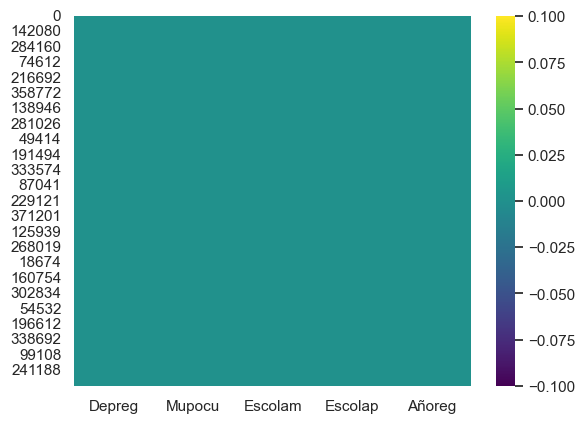

In [174]:
sns.heatmap(data.isna(), cmap='viridis')
plt.show()